In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
file = np.genfromtxt('catRawMags1305/catDir/matchedFLCpsf0906.dat',names=True)

In [11]:
psf_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
psf = np.genfromtxt(psf_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT')

In [12]:
mat_match = np.genfromtxt('pixPosHorIhannah_idmattia.dat',names=True)

In [40]:
matched = np.genfromtxt('catRawMags1305/catDir/matchedMattiaInfo.dat',names=True)

In [98]:
match_g = matched[matched['m814c']>10]

In [86]:
file_g = file[file['magPSF']>10]
file_g = file_g[file_g['c_star']>0.5]

In [87]:
magDiff = file_g['magZPT'] - file_g['magPSF']

In [88]:
print('Median:',np.median(magDiff))
print('Mean:',np.mean(magDiff))
print('St. Dev:',np.std(magDiff))
print('Num. of Sources:',len(magDiff))

Median: 0.028585735368958254
Mean: -0.01814038415966137
St. Dev: 0.3194102735991613
Num. of Sources: 990


In [89]:
magOrig = match_g['mag1'] - match_g['m814c']
print('Median:',np.median(magOrig))
print('Mean:',np.mean(magOrig))
print('St. Dev:',np.std(magOrig))
print('Num. of Sources:',len(magOrig))

Median: 0.2822500000000012
Mean: 0.27688516260162604
St. Dev: 0.2611519368735998
Num. of Sources: 1476


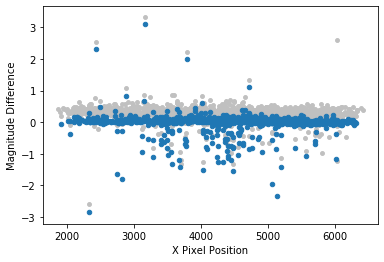

In [91]:
fig, ax = plt.subplots()

ax.scatter(match_g['xPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['xPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('X Pixel Position')

plt.show()

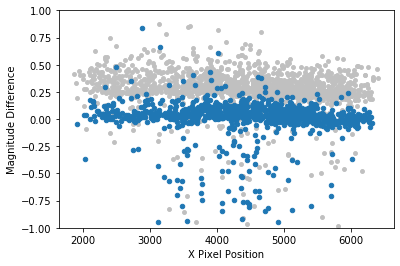

In [92]:
fig, ax = plt.subplots()

ax.scatter(match_g['xPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['xPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('X Pixel Position')

ax.set_ylim(-1,1)
plt.show()

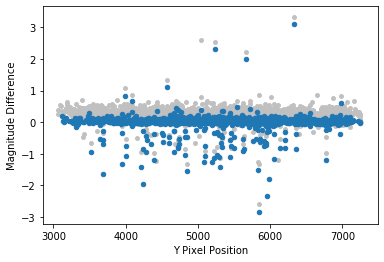

In [93]:
fig, ax = plt.subplots()

ax.scatter(match_g['yPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['yPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('Y Pixel Position')

plt.show()

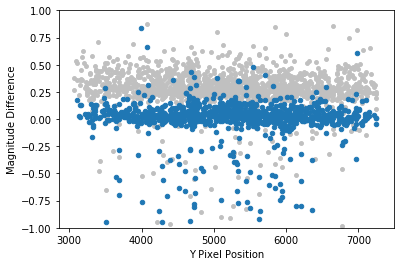

In [94]:
fig, ax = plt.subplots()

ax.scatter(match_g['yPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['yPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('Y Pixel Position')

ax.set_ylim(-1,1)
plt.show()

In [48]:
len(match_g)

1476

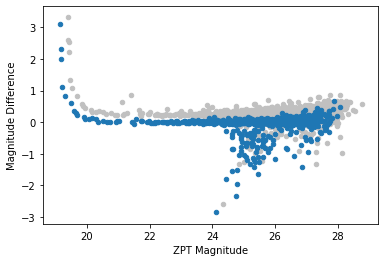

In [95]:
fig, ax = plt.subplots()

ax.scatter(match_g['mag1'],magOrig,s=20,color='silver')
ax.scatter(file_g['magZPT'],magDiff,s=20)


ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('ZPT Magnitude')

plt.show()

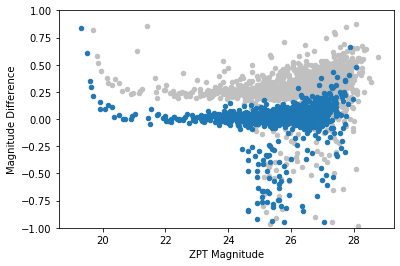

In [96]:
fig, ax = plt.subplots()

ax.scatter(match_g['mag1'],magOrig,s=20,color='silver')
ax.scatter(file_g['magZPT'],magDiff,s=20)


ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('ZPT Magnitude')

ax.set_ylim(-1,1)
plt.show()

In [74]:
keep = file_g['mag1']!=file_g['mag1']
tmp_keep = np.logical_and(magDiff>=-0.1,magDiff<=0.1)
keep = np.logical_or(keep,tmp_keep)

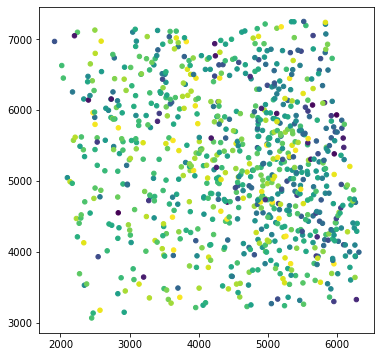

In [76]:
fig, ax = plt.subplots(figsize=(6,6))


ax.scatter(file_g['xPSF_trans'][keep],file_g['yPSF_trans'][keep],c=magDiff[keep],s=20)


plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
# .reshape((-1, 1))

In [72]:
model = LinearRegression().fit(file_g['yPSF_trans'].reshape((-1,1)),magDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.0490268975224794
slope: [-7.95220996e-06]


In [81]:
model = LinearRegression().fit(file_g['xPSF_trans'].reshape((-1,1)),magDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.11559566661407268
slope: [-2.4726184e-05]
